<a href="https://colab.research.google.com/github/Kumarkashish511/Topsis_for_Pretrained-Models/blob/main/Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          Model  TOPSIS Score  Rank
3  LLaMA-2 Chat      0.728429   1.0
0       GPT-3.5      0.680213   2.0
2    Gemini 1.5      0.384326   3.0
4      Claude 3      0.345216   4.0
1         GPT-4      0.262262   5.0


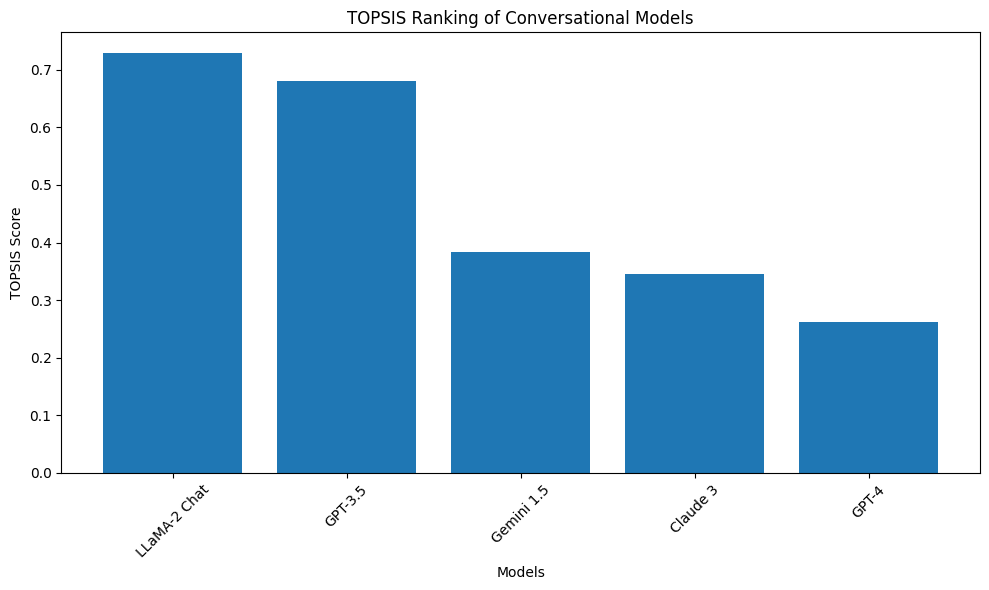

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

models = [
    "GPT-3.5",
    "GPT-4",
    "Gemini 1.5",
    "LLaMA-2 Chat",
    "Claude 3"
]

decision_matrix = np.array([
    [8.0, 7.0, 600, 0.002, 7.0],
    [9.5, 9.0, 900, 0.030, 9.0],
    [9.0, 8.5, 750, 0.020, 8.5],
    [8.0, 7.5, 500, 0.000, 7.0],
    [9.2, 9.5, 800, 0.025, 9.5]
])

weights = np.array([0.30, 0.25, 0.15, 0.15, 0.15])
criteria_type = np.array([1, 1, 0, 0, 1])

norm_matrix = decision_matrix / np.sqrt((decision_matrix ** 2).sum(axis=0))
weighted_matrix = norm_matrix * weights

ideal_best = np.where(criteria_type == 1,
                      weighted_matrix.max(axis=0),
                      weighted_matrix.min(axis=0))

ideal_worst = np.where(criteria_type == 1,
                       weighted_matrix.min(axis=0),
                       weighted_matrix.max(axis=0))

distance_best = np.sqrt(((weighted_matrix - ideal_best) ** 2).sum(axis=1))
distance_worst = np.sqrt(((weighted_matrix - ideal_worst) ** 2).sum(axis=1))

topsis_score = distance_worst / (distance_best + distance_worst)

results = pd.DataFrame({
    "Model": models,
    "TOPSIS Score": topsis_score
})

results["Rank"] = results["TOPSIS Score"].rank(ascending=False)
results = results.sort_values(by="TOPSIS Score", ascending=False)

print(results)

plt.figure(figsize=(10,6))
plt.bar(results["Model"], results["TOPSIS Score"])
plt.title("TOPSIS Ranking of Conversational Models")
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()